In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
results_dir = 'results-structure'

In [2]:
df_results_list = []

for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
    repetition_id = file.split('repetition_')[1].split('_')[0]
    repetition_id = int(repetition_id)
big_perf_df = pd.concat(df_results_list)
big_perf_df

,algo,score,metric,type,split,n_var,n_samples,idx_features_used_binary_code,structure,gap_E0_E1,proportion_of_ones
0,ICSCMconjunction,0.472250,accuracy,test,6,3,10000,0,treecomplete7,0.25,0.6
1,ICSCMconjunction,0.479938,accuracy,train,6,3,10000,0,treecomplete7,0.25,0.6
2,ICSCMconjunction,0.000000,01 loss,causal,6,3,10000,0,treecomplete7,0.25,0.6
3,ICSCMconjunction,0.568679,t2-t1,fit time,6,3,10000,0,treecomplete7,0.25,0.6
0,DT,0.989000,accuracy,test,1,3,10000,127,conjunction2,0.25,0.9
...,...,...,...,...,...,...,...,...,...,...,...
3,DT,0.006575,t2-t1,fit time,8,3,10000,251,treecomplete3,0.25,0.6
0,ICSCM,0.972750,accuracy,test,2,3,10000,240,disjunction4,0.25,0.3
1,ICSCM,0.973187,accuracy,train,2,3,10000,240,disjunction4,0.25,0.3
2,ICSCM,1.000000,01 loss,causal,2,3,10000,240,disjunction4,0.25,0.3


In [3]:
big_perf_df['algo'].unique()

array(['ICSCMconjunction', 'DT', 'ICSCM', 'ICP+DT', 'ICSCMdisjunction',
       'SCM'], dtype=object)

In [4]:
big_perf_df['structure'].unique()

array(['treecomplete7', 'conjunction2', 'treecomplete3', 'disjunction3',
       'conjunction1', 'conjunction4', 'conjunction3', 'disjunction2',
       'disjunction1', 'treecomplete1', 'disjunction4'], dtype=object)

In [5]:


n_samples_of_plot = 10000
big_perf_df = big_perf_df[big_perf_df['n_samples'] == n_samples_of_plot]
big_perf_df = big_perf_df[big_perf_df['n_var'] == 3]


big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)
algos_to_keep = [
                'SCM', 
                'DT', 
                'ICP', 
                'ICSCM',
                ]

big_perf_df['structure'].replace({'disjunction1': 'Single rule'}, inplace=True)
for structure in big_perf_df['structure'].unique():
    if structure == 'Single rule':
        continue
    structure_type = structure[:-1]
    # capitalize first letter
    structure_size = structure[-1]
    if structure_type in ['conjunction', 'disjunction']:
        structure_type = structure_type[0].upper() + structure_type[1:]
        new_name = f'{structure_type} of {structure_size} rules'
    elif structure_type in ['treecomplete']:
        new_name = f'Decision tree with {structure_size} nodes'
    big_perf_df['structure'].replace({structure: new_name}, inplace=True)
structures_to_keep = [
                'Single rule', 
                'Conjunction of 2 rules',
                'Conjunction of 3 rules',
                'Conjunction of 4 rules',
                'Disjunction of 2 rules',
                'Disjunction of 3 rules',
                'Disjunction of 4 rules',
                'Decision tree with 3 nodes',
                'Decision tree with 7 nodes',
                 ]


big_perf_df = big_perf_df[big_perf_df['algo'].isin(algos_to_keep)]
x_order = sorted(list(set(big_perf_df['structure'])))

perf_df_causalscore = big_perf_df[big_perf_df['type'] == 'causal']

n_split_required = 10

for a in set(perf_df_causalscore['algo']):
    perf_df_causalscore_a = perf_df_causalscore[perf_df_causalscore['algo'] == a]
    for s in set(perf_df_causalscore['structure']):
        perf_df_causalscore_a_n = perf_df_causalscore_a[perf_df_causalscore_a['structure'] == s]
        splits = set(perf_df_causalscore_a_n['split'])
        if len(splits) < n_split_required:
            print(f'Warning: {a, s} has only {len(splits)} splits')
            # remove the rows
            perf_df_causalscore = perf_df_causalscore[~((perf_df_causalscore['algo'] == a) & (perf_df_causalscore['structure'] == s))]
perf_df_causalscore = perf_df_causalscore[perf_df_causalscore['split'].isin(list(range(n_split_required)))]

/tmp/ipykernel_17345/1401018214.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)
/tmp/ipykernel_17345/1401018214.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
structure_values = structures_to_keep
algos_values = algos_to_keep
print(algos_values)

['SCM', 'DT', 'ICP', 'ICSCM']


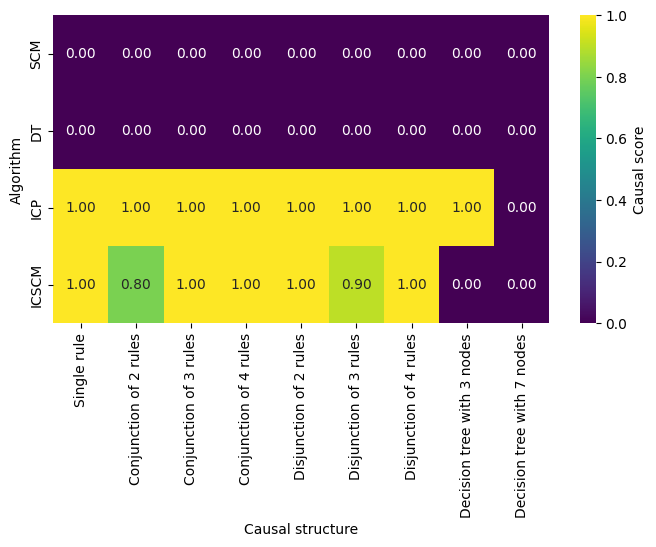

In [ ]:
heatmap_df = perf_df_causalscore.pivot_table(index='algo', columns='structure', values='score', aggfunc='mean')
heatmap_df = heatmap_df.reindex(index=algos_values, columns=structure_values)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Causal score'})
#plt.title('Score (identification of causal variables) of algorithms on different causal structures', fontsize=10)
plt.xlabel('Causal structure', fontsize=10)
plt.ylabel('Algorithm', fontsize=10)
#plt.savefig('figures/exp-structure-heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/exp-structure-heatmap.pdf', bbox_inches='tight')
plt.show()